In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_election_data=pd.read_csv('LS_2.0.csv')

In [3]:
raw_election_data.at[172, "TOTAL\nVOTES"]=357169
raw_election_data.at[173, "TOTAL\nVOTES"]=33772

In [4]:
def convert(x):
    #if it contains value in indian rupees
    if str(x)[0]=='R':
        return float(str(x).split()[1].replace(',',''))
    #if nothing given the let it be zero
    return 0.0

In [5]:
raw_election_data.ASSETS=raw_election_data.ASSETS.apply(convert)
raw_election_data.LIABILITIES=raw_election_data.LIABILITIES.apply(convert)

In [6]:
raw_election_data.sample(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1123,Uttar Pradesh,KAUSHAMBI,VINOD KUMAR SONKAR,1,BJP,Lotus,MALE,4,49.0,SC,Graduate,59336113.0,20730086.0,381517,1492,383009,21.431633,39.281484,1787120
837,Bihar,HAJIPUR (SC),UMESH DAS,0,BSP,Elephant,MALE,0,47.0,SC,10th Pass,11021433.0,1500000.0,14424,155,14579,0.799435,1.446789,1823664
1172,Uttar Pradesh,KHERI,Vipnesh Shukla,0,CPI(M),Ears of Corn And Sickle,MALE,0,68.0,GENERAL,Graduate Professional,9470000.0,0.0,11857,0,11857,0.669623,1.043041,1770699
1290,Punjab,LUDHIANA,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10458,80,10538,0.626023,1.006471,1683325
729,Uttar Pradesh,FATEHPUR SIKRI,RAJ BABBAR,0,INC,Hand,MALE,4,68.0,GENERAL,Graduate,182861705.0,12294927.0,170889,1193,172082,10.011537,16.570884,1718837


In [7]:
raw_election_data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [8]:
candidates_df=raw_election_data.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)
# take out the unnecessary columns

In [9]:
candidates_df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'TOTAL\nVOTES', 'TOTAL ELECTORS'],
      dtype='object')

In [10]:
candidates_df.rename(columns={'CRIMINAL\nCASES':'CRIMINAL CASES','TOTAL\nVOTES':'TOTAL VOTES'}, inplace=True)
candidates_df.sort_values(['STATE','CONSTITUENCY'], inplace=True)

In [11]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


In [12]:
candidates_df["CRIMINAL CASES"] = pd.to_numeric(candidates_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()


In [13]:
candidates_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0,2839,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0,2486,318471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0,16001,1694646
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0,694945,1614988
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0,479586,1614988
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0,81314,1614988


In [14]:
candidates_personal_df=candidates_df[candidates_df.NAME!='NOTA']

In [15]:
candidates_personal_df=candidates_personal_df.drop(['TOTAL VOTES','TOTAL ELECTORS'], axis=1)

In [16]:
candidates_personal_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0


In [17]:
winners_df=candidates_df[candidates_df.WINNER==1].sort_values(['STATE','CONSTITUENCY']).reset_index()

In [18]:
winners_df.drop(['index','WINNER'], axis=1, inplace=True)

In [19]:
winners_df

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate Professional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate Professional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
535,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,MALE,1,56.0,SC,Graduate Professional,17622476.0,0.0,783253,1762252
536,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,MALE,0,62.0,GENERAL,Graduate Professional,175968902.0,5522403.0,637707,1785472
537,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


In [20]:
#candidates_df.PARTY.unique().shape[0]-2  #: 1 for NOTA and 1 for independent
print("Number of Parties which fielded at least 1 candidate: ",candidates_df.PARTY.unique().shape[0]-2)

Number of Parties which fielded at least 1 candidate:  131


In [21]:
#Total Independent candidates
#candidates_df[candidates_df.PARTY=='IND'].shape[0]
print("Total number on independent candidates are:",candidates_df[candidates_df.PARTY=='IND'].shape[0])

Total number on independent candidates are: 201


In [22]:
# no of parties won atleast one seat
print("No of parties won atleast one seat is:",winners_df.PARTY.unique().shape[0]-1)

No of parties won atleast one seat is: 35


In [23]:
#independent winners"
print("Total number of independent winners:",winners_df[winners_df.PARTY=='IND'].shape[0])


Total number of independent winners: 4


# Exploratory Data Analysis

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### SeatShare

### Seat won by each party and the percentage distribution of the house

In [26]:
all_party_seats=winners_df.PARTY.value_counts().sort_values(ascending=False)


In [27]:
all_party_seats

PARTY
BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
SP          5
CPI(M)      5
NCP         5
IND         4
JKN         3
TDP         3
IUML        3
AIMIM       2
ADAL        2
SAD         2
NPEP        1
MNF         1
NDPP        1
AIUDF       1
KEC(M)      1
AAP         1
RLTP        1
SKM         1
RSP         1
VCK         1
AIADMK      1
JD(S)       1
JMM         1
AJSUP       1
NPF         1
Name: count, dtype: int64

In [28]:
others=all_party_seats[all_party_seats<10].sum()
others

64

In [29]:
seat_distribution=all_party_seats[all_party_seats>=10]._append(pd.Series({"Others":others}))


In [30]:
seat_distribution

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
Others     64
dtype: int64

#### Distibution as pie chart

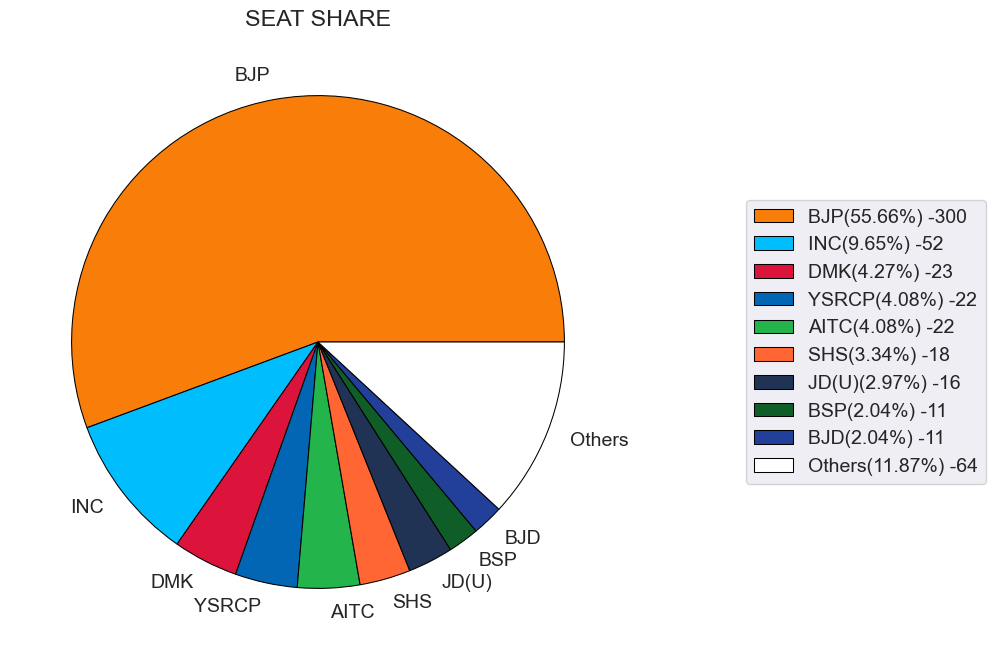

In [31]:
fig=plt.figure(figsize=(10,8))
plt.title("SEAT SHARE")

plt.pie(seat_distribution, labels=seat_distribution.index,
       colors=['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
        wedgeprops={'edgecolor':'black','linewidth':0.75, 'antialiased':True})
seat_percent=round((seat_distribution/seat_distribution.sum())*100,2)
legend=seat_percent.index+ "(" +seat_percent.values.astype(str)+"%) -" + seat_distribution.values.astype(str)

plt.legend(legend, loc='right', bbox_to_anchor=(1.6,0.5));

## Age

### The number of candidates both in contestants and winners, in each age group

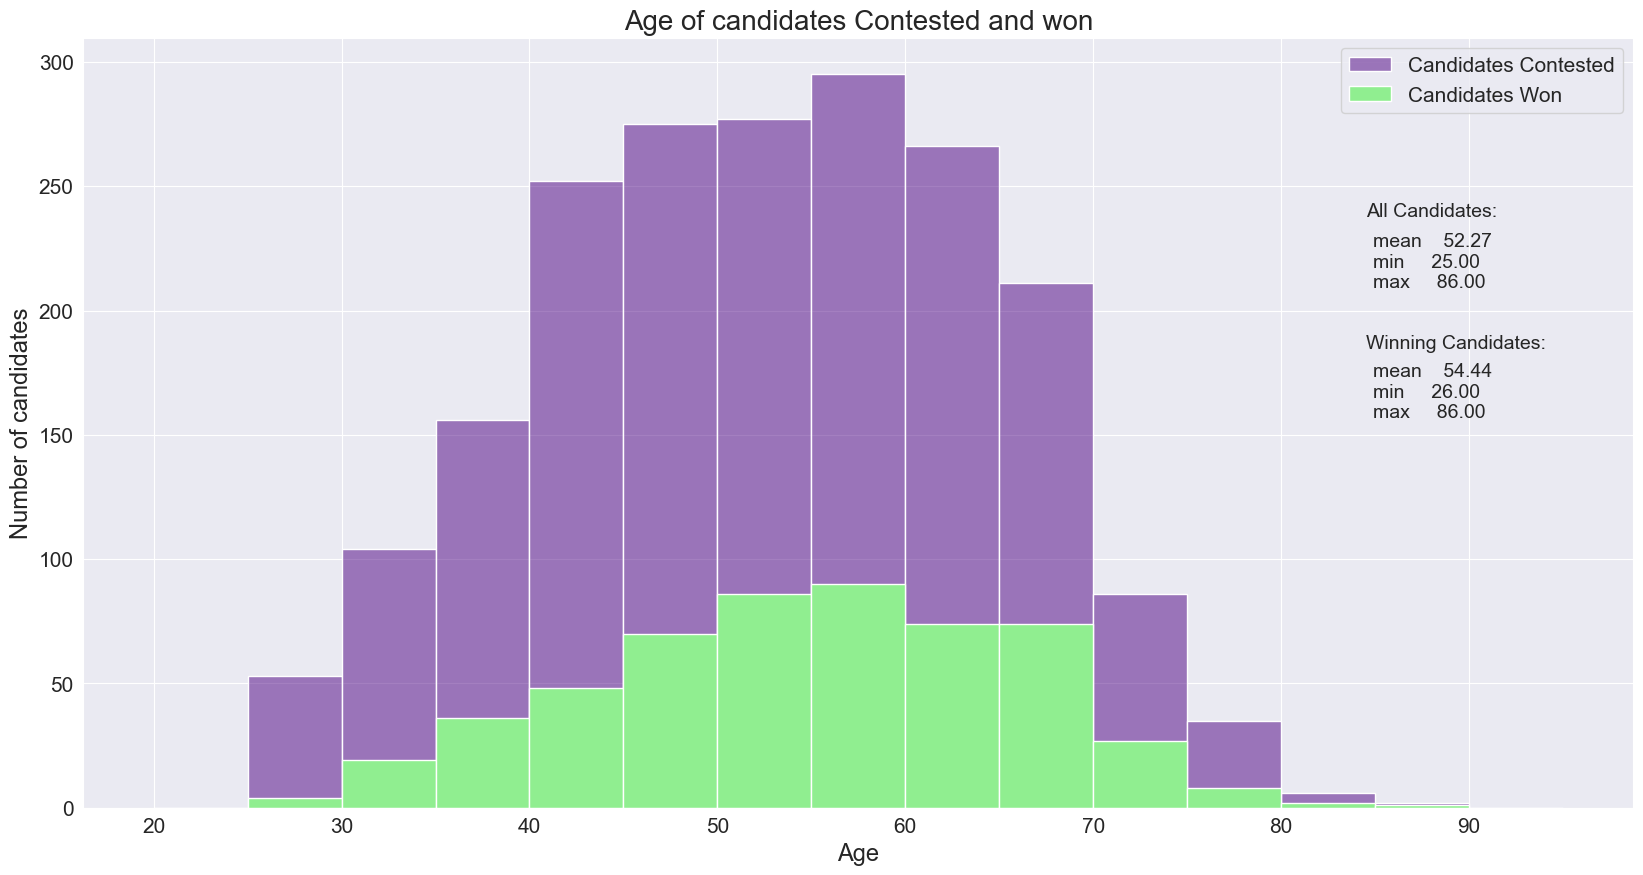

In [32]:
plt.figure(figsize=(20,10))
plt.title("Age of candidates Contested and won",fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.histplot(data=candidates_personal_df, x='AGE', bins=np.arange(20,100,5), color='indigo', alpha=0.5)
sns.histplot(data=winners_df, x='AGE', bins=np.arange(20,100,5),color='lightgreen', alpha=1 )

plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)


plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidates_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winners_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());

In [33]:
winners_df.AGE.min()

26.0

In [34]:
print("Youngest member of house:")
winners_df[(winners_df.AGE==26)][["NAME","PARTY","STATE","CONSTITUENCY"]].reset_index(drop=True)

Youngest member of house:


,NAME,PARTY,STATE,CONSTITUENCY
0,GODDETI. MADHAVI,YSRCP,Andhra Pradesh,ARUKU


In [35]:
winners_df.AGE.max()

86.0

In [36]:
print("Oldest member of house:")
winners_df[(winners_df.AGE==86)][["NAME","PARTY","STATE","CONSTITUENCY"]].reset_index(drop=True)

Oldest member of house:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


## Seat Category

### Now ratio of seats which have a special reservation status for candidates of different backward classes

In [37]:
seat_category=winners_df.CATEGORY.value_counts()
seat_category

CATEGORY
GENERAL    399
SC          85
ST          55
Name: count, dtype: int64

In [38]:
pd.DataFrame(seat_category)

,count
CATEGORY,
GENERAL,399
SC,85
ST,55


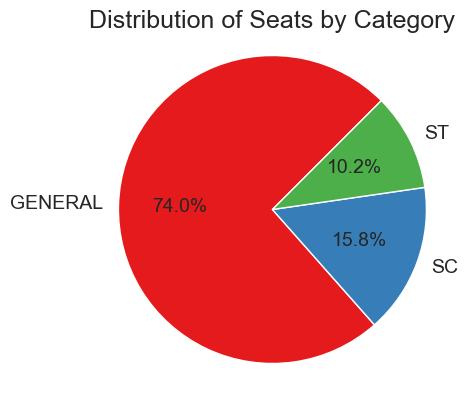

In [39]:
sns.set_palette(sns.color_palette('Set1'))

plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x = 0.5, y =0.95)

plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%',startangle = 45);

## Gender

### Gender diversity of the contesting candidates, as well as the winning Members of Parliament

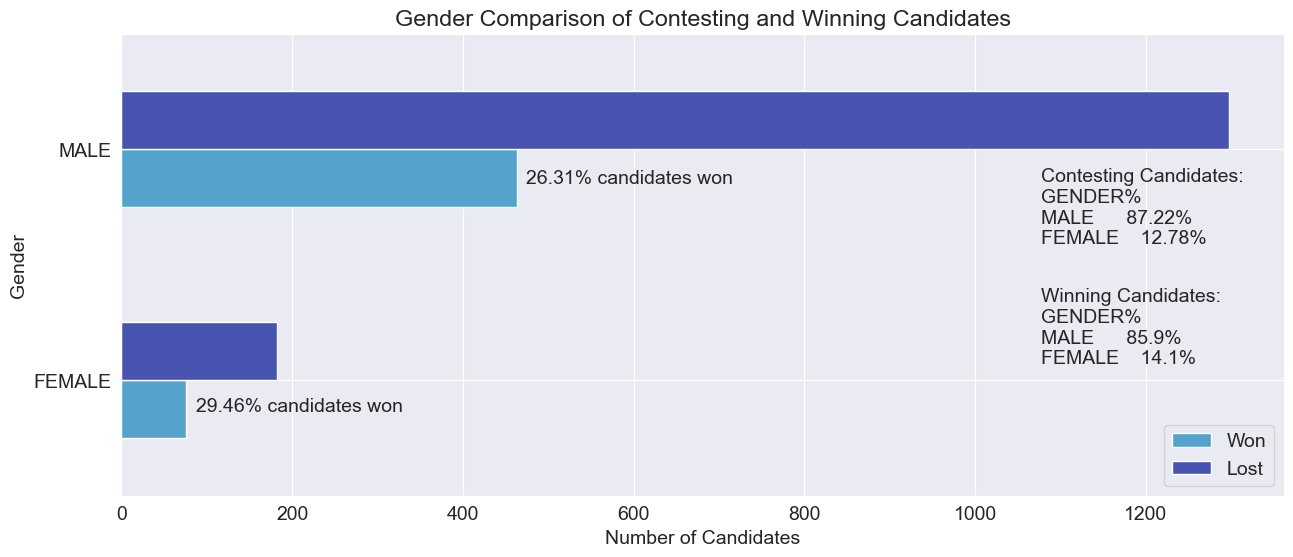

In [40]:
gender_group=candidates_personal_df.groupby(["GENDER","WINNER"]).size()
gender_group=gender_group.unstack()
gender_group=gender_group[[1,0]]

#gender with winning condition is extracted as dataframe

sns.set_palette(sns.color_palette("icefire"))
# color palette set
gender_group.plot(kind='barh', figsize=(15,6), title="Gender Comparison of Contesting and Winning Candidates")
#horizontal bar plot created with Pandas

plt.legend(["Won","Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n"+
           round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n","%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n"+
           round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n","%\n")+"%")

# Total candidates stastistics (percentages) printed on the chart, with some applied Sting formatting to give the look.

win_percent=round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2))+ "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won");
# percentage of winning, gender-wise printed on the chart

In [41]:
print("No. of male MPs:", winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs:", winners_df.GENDER.value_counts()["FEMALE"])


No. of male MPs: 463
No. of female MPs: 76


## Educational Qualifications

### Now we have to analyse educational qualifications of winning Candidates

In [42]:
winners_df["EDUCATION"].unique()

array(['Graduate Professional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Literate',
       'Post Graduate\n', 'Others', '5th Pass', 'Illiterate'],
      dtype=object)

In [43]:
education=winners_df.EDUCATION.value_counts()
education

EDUCATION
Post Graduate            134
Graduate                 132
Graduate Professional     99
12th Pass                 69
10th Pass                 45
Doctorate                 23
Others                    17
8th Pass                  12
5th Pass                   4
Literate                   2
Post Graduate\n            1
Illiterate                 1
Name: count, dtype: int64

In [44]:
education = education.reindex(["Illiterate", "Literate","Post Graduate\n", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate Professional","Post Graduate", "Doctorate", "Others"])
# arrange the Series in a systematic order

In [45]:
education

EDUCATION
Illiterate                 1
Literate                   2
Post Graduate\n            1
5th Pass                   4
8th Pass                  12
10th Pass                 45
12th Pass                 69
Graduate                 132
Graduate Professional     99
Post Graduate            134
Doctorate                 23
Others                    17
Name: count, dtype: int64

### Plot the data as a Bar Chart

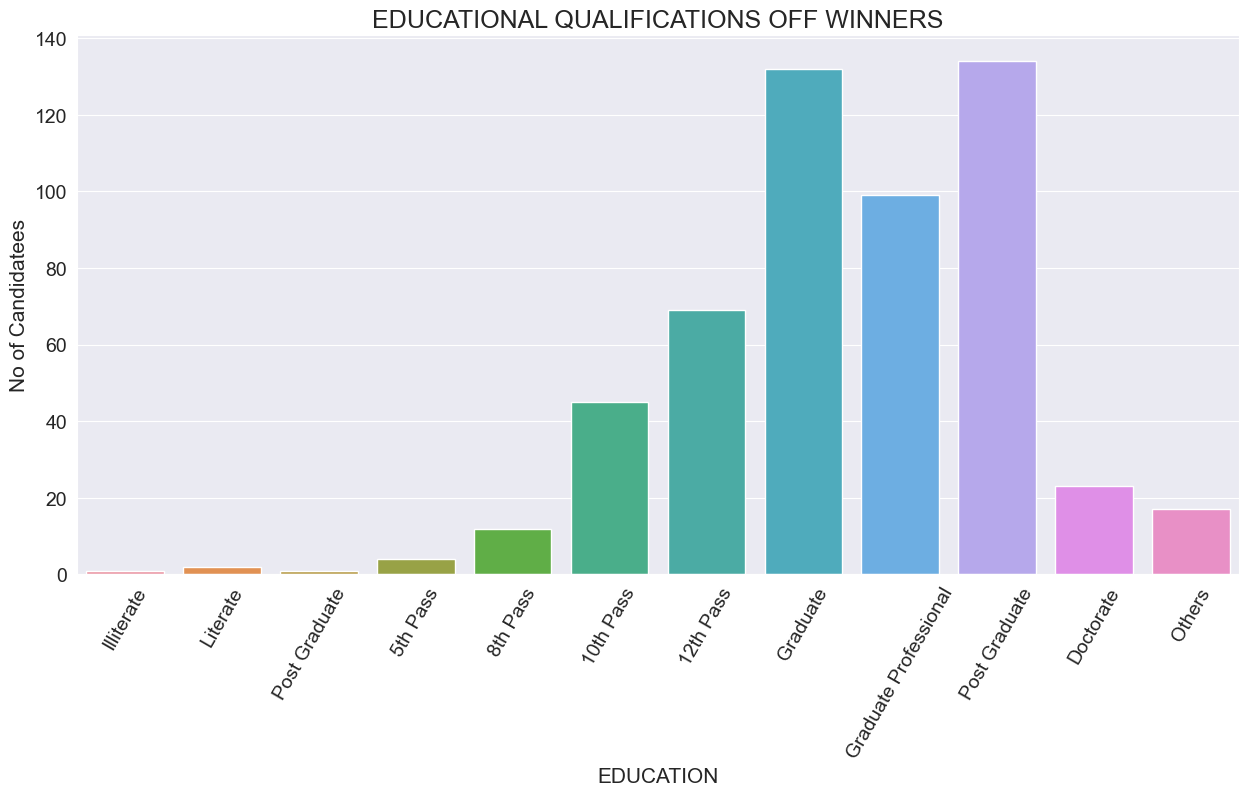

In [46]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60);
# plot detailing

plt.xlabel("Education Status", fontsize=15)
plt.ylabel("No of Candidatees",fontsize=15)
plt.title("EDUCATIONAL QUALIFICATIONS OFF WINNERS", fontsize=18)
#labels and title

sns.barplot(x=education.index, y=education.values);
# plotting the barplot

# Analyzing Some Important Questions

## Q1: Which States/UTs and Constituencies had the highest and the lowest Voter Turnout?

In [47]:
total_voters=candidates_df.groupby(["STATE","CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors=winners_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df=total_voters.join(total_electors)
votes_df["VOTER TURNOUT"]=round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)

In [48]:
votes_df

TOTAL VOTES   
STATE                     CONSTITUENCY                             
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS       199875  \
Andhra Pradesh            AMALAPURAM                     1203906   
                          ANAKAPALLI                     1214021   
                          ANANTAPUR                      1315827   
                          ARUKU                          1051721   
...                                                          ...   
West Bengal               RAIGANJ                        1242176   
                          RANAGHAT                       1454146   
                          SRERAMPUR                      1382169   
                          TAMLUK                         1410831   
                          ULUBERIA                       1283413   

                                                     TOTAL ELECTORS   
STATE                     CONSTITUENCY                                
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS        318471.0  \
Andhra Pradesh            AMALAPURAM                      1459556.0   
                          ANAKAPALLI                      1521363.0   
                          ANANTAPUR                       1664160.0   
                          ARUKU                           1451418.0   
...                                                             ...   
West Bengal               RAIGANJ                         1601220.0   
                          RANAGHAT                        1762252.0   
                          SRERAMPUR                       1785472.0   
                          TAMLUK                          1694646.0   
                          ULUBERIA                        1614988.0   

                                                     VOTER TURNOUT  
STATE                     CONSTITUENCY                              
Andaman & Nicobar Islands ANDAMAN & NICOBAR ISLANDS          62.76  
Andhra Pradesh            AMALAPURAM                         82.48  
                          ANAKAPALLI                         79.80  
                          ANANTAPUR                          79.07  
                          ARUKU                              72.46  
...                                                            ...  
West Bengal               RAIGANJ                            77.58  
                          RANAGHAT                           82.52  
                          SRERAMPUR                          77.41  
                          TAMLUK                             83.25  
                          ULUBERIA                           79.47  

[542 rows x 3 columns]

In [49]:
votes_df=votes_df.rename(index={"Andaman & Nicobar Islands":"Andaman &\nNicobar Islands"})
# this is done puerly for visualization purposes
const_turnout=votes_df.sort_values(by=["VOTER TURNOUT"], ascending=False)
# Voter Turnout of all constituencies

high_consts=const_turnout.head(10)
low_consts=const_turnout.tail(10)
# getting the highest and the lowest Voter Outcome Constituencies

In [50]:
const_turnout.fillna(const_turnout.mean(), inplace=True)

In [51]:
# getting the state-wise data now
states_df=votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis=1)
states_df["VOTER TURNOUT"]=round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)
# necessary arithmetic to calculate the required Voter Turnout of all States


In [52]:
states_df

,TOTAL VOTES,TOTAL ELECTORS,VOTER TURNOUT
STATE,,,
Andaman &\nNicobar Islands,199875,318471.0,62.76
Andhra Pradesh,30968703,39405967.0,78.59
Arunachal Pradesh,646335,803563.0,80.43
Assam,17441534,22050059.0,79.10
Bihar,38755595,72959173.0,53.12
Chandigarh,436583,646729.0,67.51
Chhattisgarh,13092035,19016462.0,68.85
Dadra & Nagar Haveli,193316,250029.0,77.32
Daman & Diu,86677,121740.0,71.20


In [53]:
states_turnout=states_df.sort_values(by="VOTER TURNOUT", ascending=False)
high_stat=states_turnout.head(10)
low_stat=states_turnout.tail(10)
# getting the highest and lowest Voter Outcome States


In [54]:
# Just for aesthetics

xh=high_consts.index.get_level_values(1)+ "\n(" + high_consts.index.get_level_values(0) + ")"
xl=low_consts.index.get_level_values(1)+"\n(" + low_consts.index.get_level_values(0) + ")"


In [55]:
low_consts.index.get_level_values(1)+"\n(" + low_consts.index.get_level_values(0) + ")"

Index(['PATNA SAHIB\n(Bihar)', 'NALANDA\n(Bihar)',
       'BARAMULLA\n(Jammu & Kashmir)', 'AURANGABAD\n(Bihar)',
       'SRINAGAR\n(Jammu & Kashmir)', 'ANANTNAG\n(Jammu & Kashmir)',
       'JALNA\n(Maharashtra)', 'KEONJHAR\n(Odisha)', 'BADAUN\n(Uttar Pradesh)',
       'ETAWAH\n(Uttar Pradesh)'],
      dtype='object')

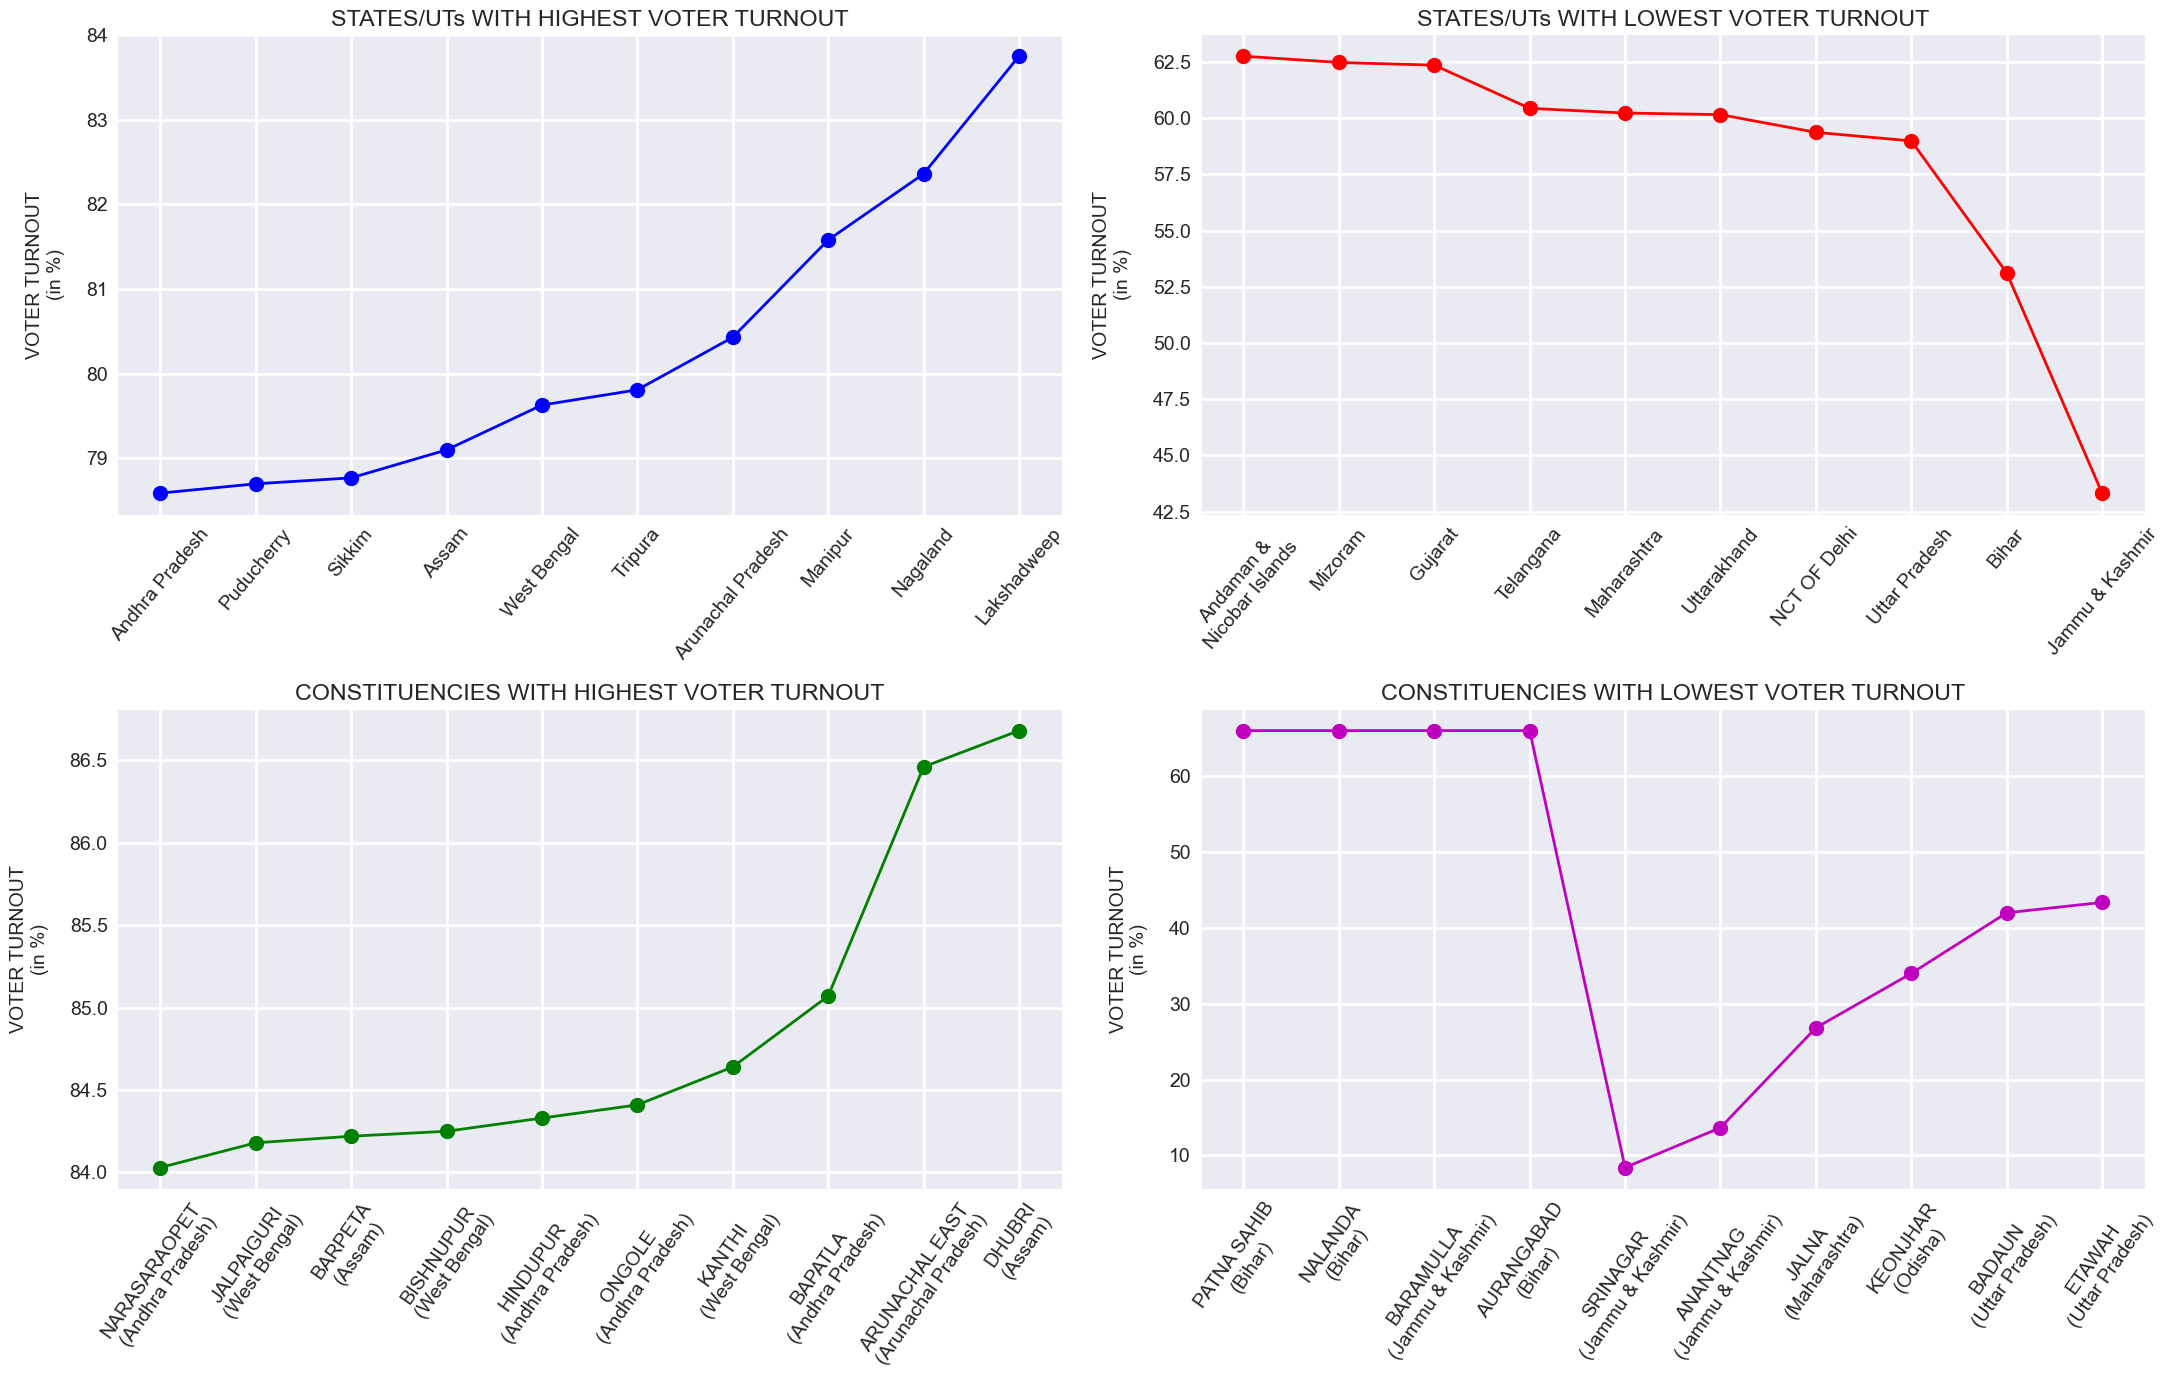

In [56]:
fig, axes=plt.subplots(2,2, figsize=(22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second wor of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis='x', labelrotation=50)
axes[0][0].plot(high_stat.index[::-1], high_stat['VOTER TURNOUT'][::-1], 'b-o', linewidth=2,
               markersize=10)
axes[0][0].set_ylabel("VOTER TURNOUT\n(in %)", labelpad=15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth=2)
#putting the necessary detailing and plotting

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis='x', labelrotation=50)
axes[0][1].plot(low_stat.index, low_stat['VOTER TURNOUT'], 'r-o', linewidth=2,
               markersize=10)
axes[0][1].set_ylabel("VOTER TURNOUT\n(in %)", labelpad=15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth=2)
#putting the necessary detailing and plotting

# Now the Constituencies

# Highest Constituency Voter Outcome Plot
axes[1][0].tick_params(axis='x', labelrotation=55)
axes[1][0].plot(xh[::-1], high_consts['VOTER TURNOUT'][::-1], 'g-o', linewidth=2,
               markersize=10)
axes[1][0].set_ylabel("VOTER TURNOUT\n(in %)", labelpad=15)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth=2)
#putting the necessary detailing and plotting


# Lowest State Voter Outcome Plot
axes[1][1].tick_params(axis='x', labelrotation=55)
axes[1][1].plot(xl, low_consts['VOTER TURNOUT'][::-1], 'm-o', linewidth=2,
               markersize=10)
axes[1][1].set_ylabel("VOTER TURNOUT\n(in %)", labelpad=15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth=2)
#putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots






In [57]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.65%


## Q2: How many elected MPs have a criminal record and what is their party-wise distribution?

In [58]:
crime=winners_df[winners_df["CRIMINAL CASES"]!=0]['PARTY'].value_counts()

In [59]:
crime

PARTY
BJP       114
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         6
TRS         3
NCP         2
SP          2
AIMIM       2
IND         2
IUML        2
CPI(M)      2
TDP         1
BJD         1
SAD         1
AIUDF       1
VCK         1
AJSUP       1
JKN         1
ADAL        1
RSP         1
Name: count, dtype: int64

In [60]:
# shortening the Series for better visualization

crime=crime[:9]._append(pd.Series([crime[9:].sum()]))
# taking total 10 elements in the series
crime.rename(index={0:"Others"}, inplace=True)

In [61]:
crime

BJP       114
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         6
Others     24
dtype: int64

**Plot the data as a horizontal bar chart, with the appropiate color gradding**

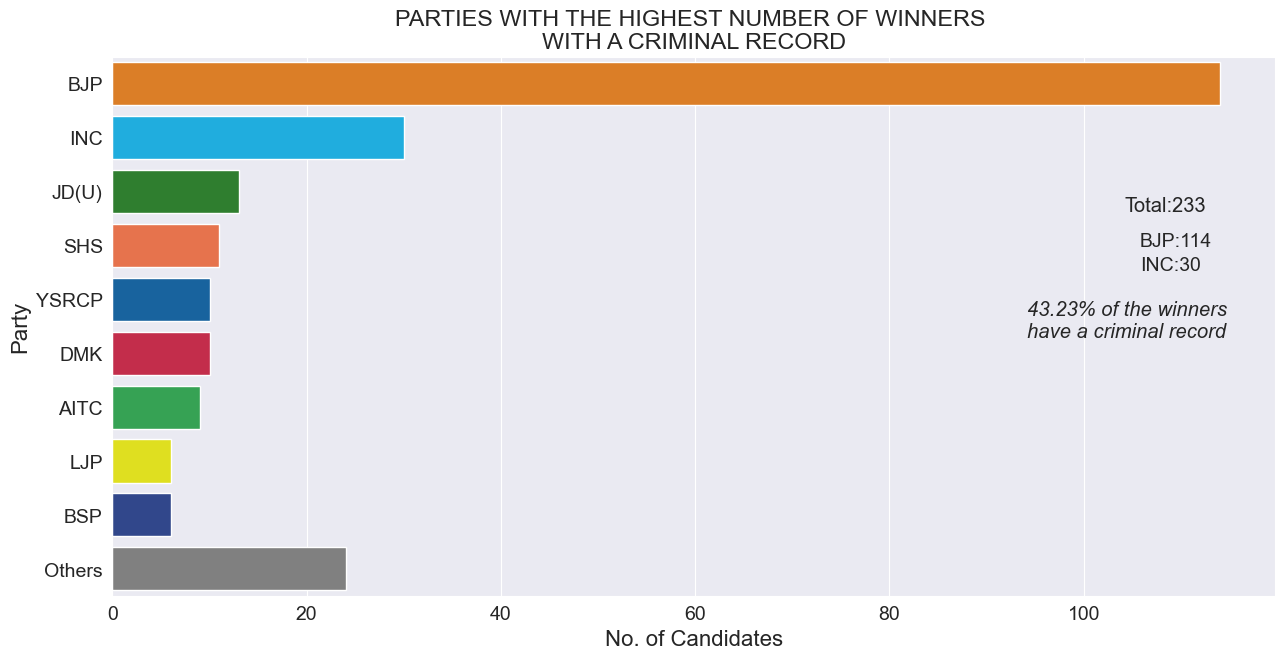

In [62]:
plt.figure(figsize=(15,7))

palette=['#f97d09','#00bdfe','#228b22', '#ff6634', '#0266b4', '#dc143c', '#24b44c', 
                                      'yellow', '#22409a', 'grey']
#color palette is customized to correspond to each party's colors
sns.barplot(x=crime.values, y=crime.index, palette=sns.set_palette(palette,10))
# the data is plotted as a horizontal bar plot

plt.title("PARTIES WITH THE HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD")
plt.ylabel("Party", fontsize=16)
plt.xlabel("No. of Candidates", fontsize=16)
# plot detailing

plt.figtext(0.8, 0.66, "Total:"+ str(crime.sum()), fontsize=14.5)
plt.figtext(0.81,0.61, "BJP:"+str(crime["BJP"].sum()), fontsize=14)
plt.figtext(0.81,0.575, "INC:"+str(crime["INC"].sum()), fontsize=14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winners_df.shape[0]*100,2))+ "% of the winners\nhave a criminal record", fontsize=14.5, style='oblique');
# printing details on the graph




In [63]:
print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2),"% BJP MPs have a criminal record")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2),"% INC MPs have a criminal record")

38.0 % BJP MPs have a criminal record
57.69 % INC MPs have a criminal record


In [64]:
winners_df.loc[45]

STATE                    Bihar
CONSTITUENCY        AURANGABAD
NAME              NARESH YADAV
PARTY                      BSP
GENDER                    MALE
CRIMINAL CASES               5
AGE                       34.0
CATEGORY               GENERAL
EDUCATION             Literate
ASSETS              12674177.0
LIABILITIES           824000.0
TOTAL VOTES             357169
TOTAL ELECTORS         1742883
Name: 45, dtype: object

## Q3: What is the distribution of assets, liabilities and net worth of the elected MPs?


In [65]:
winners_df.insert(11, "NET WORTH", winners_df["ASSETS"] - winners_df["LIABILITIES"])
# insert a new column called "NET WORTH", which is Assets - Liabilities

In [66]:
intervals=[5e6,1e7,5e7,10e7,25e7,50e7,100e7]
# money intervals

assets=winners_df["ASSETS"].sort_values()
liabilities=winners_df["LIABILITIES"].sort_values()
net_worth=winners_df['NET WORTH'].sort_values()
# individual columns extracted as Series


In [67]:
# helper function
def segregate(intervals, ownings):
    '''
    Function to return a list containing number of winners in each interval.

    intervals - list containing money intervals
    ownings - DataFrame containing data which is to be segregated into groups
    '''
    l = []
#     list to store the values
    l.append(ownings[ownings<=intervals[0]].count())
#     first entry
    
    for i in range(len(intervals)-1):
        l.append(ownings[(ownings > intervals[i]) & (ownings <= intervals[i+1])].count())
#         middle entries
        
    l.append(ownings[ownings>intervals[i+1]].count())
#     last entry
    return l

In [68]:
data = {"ASSETS" : segregate(intervals, assets),
        "LIABILITIES" : segregate(intervals, liabilities),
        "NET WORTH" : segregate(intervals, net_worth)}
# data generated 

worth_df = pd.DataFrame(data, index = ["<=50lac", ">50lac & <=1cr", ">1cr & <=5cr", ">5cr & <=10cr", ">10cr & <=25cr",
                           ">25cr & <=50cr", ">50cr & <=100cr", ">100cr"])
# new dataframe created

In [69]:
worth_df

,ASSETS,LIABILITIES,NET WORTH
<=50lac,35,338,43
>50lac & <=1cr,28,54,37
>1cr & <=5cr,211,91,208
>5cr & <=10cr,84,17,80
>10cr & <=25cr,89,22,88
>25cr & <=50cr,43,6,43
>50cr & <=100cr,23,7,19
>100cr,26,4,21


In [70]:
# Purely for visualization purposes

worth_df=worth_df.transpose()
worth_df.reset_index(inplace=True)
worth_df

,index,<=50lac,>50lac & <=1cr,>1cr & <=5cr,>5cr & <=10cr,>10cr & <=25cr,>25cr & <=50cr,>50cr & <=100cr,>100cr
0,ASSETS,35,28,211,84,89,43,23,26
1,LIABILITIES,338,54,91,17,22,6,7,4
2,NET WORTH,43,37,208,80,88,43,19,21


### Creating Bar Charts

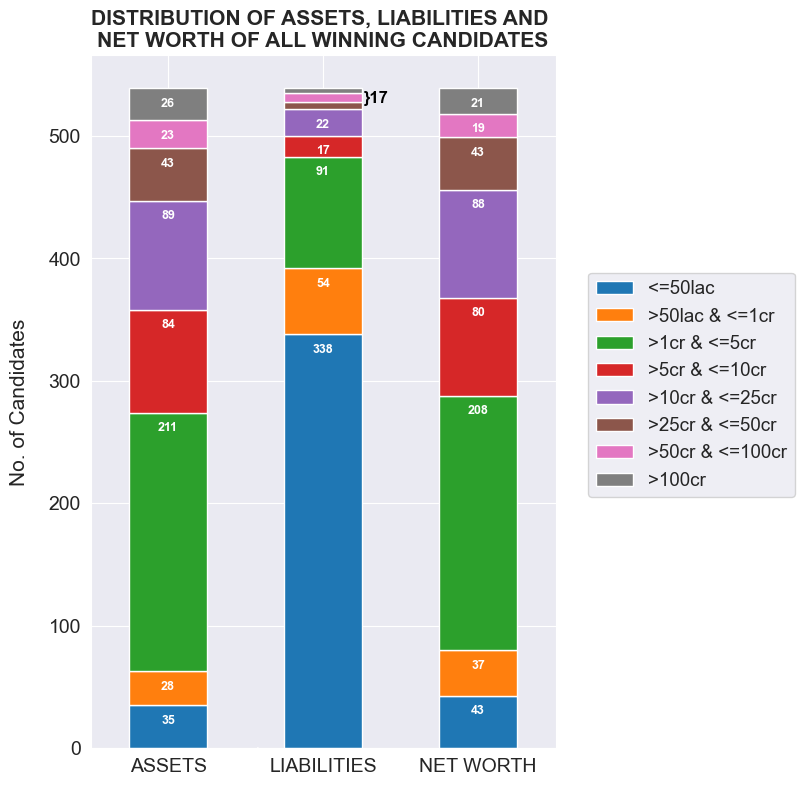

In [71]:
sns.set_palette('tab10')
#set color sequence
ax=worth_df.plot(x="index", kind='bar', stacked=True, figsize=(6,9))
# plot a Stacked Bar chart

plt.xticks(rotation=0)
plt.tick_params(labelsize=14)
plt.xlabel(None)
plt.ylabel("No. of Candidates", fontsize=15, labelpad=14)
#plot detailing

plt.title("DISTRIBUTION OF ASSETS, LIABILITIES AND \nNET WORTH OF ALL WINNING CANDIDATES", fontsize=15.25,
         weight='bold')
plt.legend(fontsize=13.5, bbox_to_anchor=[1.05,0.7]);

y_offset=-15
for bar in ax.patches:
    if round(bar.get_y())>520:
        ax.text(x=0.58,y=0.21, s=0.1, ha='center',
                color='w',
                weight='bold',
                size=0)
    else:
        ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.

      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=9
  )

plt.figtext(0.58, 0.827, "}" + str(worth_df.loc[1][">25cr & <=50cr"]+worth_df.loc[1][">50cr & <=100cr"]+worth_df.loc[1][">100cr"]),
            color = 'black', fontsize = 12, weight = "bold");




In [72]:
print("Percentage of MPs with Assets>1cr=",round((542-(worth_df.at[0, "<=50lac"]+ worth_df.at[0,">50lac & <=1cr"]))/542*100,2),"%", sep="")
print("Percentage of MPs with Net Worth>1cr=",round((542-(worth_df.at[2, "<=50lac"]+ worth_df.at[2,">50lac & <=1cr"]))/542*100,2),"%", sep="")

Percentage of MPs with Assets>1cr=88.38%
Percentage of MPs with Net Worth>1cr=85.24%


## Q4: Which 10 constituencies saw the Most One-sided and Closest victoried respectively?

In [73]:
candidates=candidates_df[["STATE","CONSTITUENCY","NAME","WINNER","PARTY","TOTAL VOTES"]]
candidates=candidates[candidates.NAME!="NOTA"]
# get all the the candidates

In [74]:
winners=candidates[candidates.WINNER==1]
runners_up=candidates.loc[winners.index+1]

winners.reset_index(drop=True, inplace=True)
runners_up.reset_index(drop=True, inplace=True)

winners.drop(["WINNER"], axis=1, inplace=True)
runners_up.drop(["WINNER"], axis=1, inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_6712\1195763571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.drop(["WINNER"], axis=1, inplace=True)


In [75]:
winners

,STATE,CONSTITUENCY,NAME,PARTY,TOTAL VOTES
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,95308
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,485958
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,586226
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,695208
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,562190
...,...,...,...,...,...
534,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,511652
535,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,783253
536,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,637707
537,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,724433


In [76]:
margin=pd.DataFrame(winners["TOTAL VOTES"].to_numpy()-runners_up["TOTAL VOTES"].to_numpy(), columns=['MARGIN OF VICTORY'])

In [77]:
margin.sort_values(by='MARGIN OF VICTORY')

,MARGIN OF VICTORY
465,181
207,823
498,1142
0,1407
152,1445
...,...
123,589177
336,612000
127,638239
130,656142


In [78]:
winners.insert(3,"WINNER", winners["NAME"]+'('+ winners["PARTY"]+')')
winners.drop(["NAME","PARTY"], axis=1, inplace=True)
winners.rename(columns={"TOTAL VOTES":"WINNER VOTES"}, inplace=True)
winners

C:\Users\kumar\AppData\Local\Temp\ipykernel_6712\2901290416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.drop(["NAME","PARTY"], axis=1, inplace=True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_6712\2901290416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.rename(columns={"TOTAL VOTES":"WINNER VOTES"}, inplace=True)


,STATE,CONSTITUENCY,WINNER,WINNER VOTES
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA(INC),95308
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA(YSRCP),485958
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi(YSRCP),586226
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH(YSRCP),695208
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI(YSRCP),562190
...,...,...,...,...
534,West Bengal,RAIGANJ,DEBASREE CHAUDHURI(BJP),511652
535,West Bengal,RANAGHAT,JAGANNATH SARKAR(BJP),783253
536,West Bengal,SRERAMPUR,KALYAN BANERJEE(AITC),637707
537,West Bengal,TAMLUK,Adhikari Dibyendu(AITC),724433


In [79]:
runners_up.insert(3,"RUNNER UP", runners_up["NAME"]+'('+ runners_up["PARTY"]+')')
runners_up.drop(["NAME","PARTY"], axis=1, inplace=True)
runners_up.rename(columns={"TOTAL VOTES":"RUNNER-UP VOTES"}, inplace=True)
runners_up

,STATE,CONSTITUENCY,RUNNER UP,RUNNER-UP VOTES
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY(BJP),93901
1,Andhra Pradesh,AMALAPURAM,GANTI HARISH MADHUR (BALAYOGI)(TDP),446163
2,Andhra Pradesh,ANAKAPALLI,ADARI ANAND KUMAR(TDP),497034
3,Andhra Pradesh,ANANTAPUR,J.C. PAVAN REDDY(TDP),553780
4,Andhra Pradesh,ARUKU,KISHORE CHANDRA DEO(TDP),338101
...,...,...,...,...
534,West Bengal,RAIGANJ,AGARWAL KANAIALAL(AITC),451078
535,West Bengal,RANAGHAT,RUPALI BISWAS(AITC),549825
536,West Bengal,SRERAMPUR,DEBJIT SARKAR(BJP),539171
537,West Bengal,TAMLUK,Sidharthashankar Naskar(BJP),534268


In [80]:
candidates=pd.concat([winners,runners_up, margin],axis=1)


In [81]:
lowest_margin=candidates.sort_values(by="MARGIN OF VICTORY").head(10)
highest_margin=candidates.sort_values(by="MARGIN OF VICTORY", ascending=False).head(10)
lowest_margin=lowest_margin.T.drop_duplicates().T
highest_margin=highest_margin.T.drop_duplicates().T

In [82]:
#Puerly for aethestics


lowest_margin.insert(2, "PLACE", lowest_margin.CONSTITUENCY + " (" + lowest_margin.STATE + ")")
lowest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
lowest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
lowest_margin.index=np.arange(1,11)

highest_margin.insert(2, "PLACE", highest_margin.CONSTITUENCY + " (" + highest_margin.STATE + ")")
highest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
highest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
highest_margin.index=np.arange(1,11)




In [83]:
highest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,NAVSARI (Gujarat),C. R. Patil(BJP),972739,PATEL DHARMESHBHAI BHIMBHAI(INC),283071,689668
2,KARNAL (Haryana),Sanjay Bhatia(BJP),911594,Kuldip Sharma(INC),255452,656142
3,FARIDABAD (Haryana),KRISHAN PAL(BJP),913222,AVTAR SINGH BHADANA(INC),274983,638239
4,BHILWARA (Rajasthan),SUBHASH CHANDRA BAHERIA(BJP),938160,RAM PAL SHARMA(INC),326160,612000
5,VADODARA (Gujarat),RANJANBEN BHATT(BJP),883719,PRASHANT PATEL (TIKO)(INC),294542,589177
6,WEST DELHI (NCT OF Delhi),PARVESH SAHIB SINGH VERMA(BJP),865648,MAHABAL MISHRA(INC),287162,578486
7,CHITTORGARH (Rajasthan),Chandra Prakash Joshi(BJP),982942,Gopal Singh Shekhawat(INC),406695,576247
8,GANDHINAGAR (Gujarat),AMIT SHAH(BJP),894624,Dr. C. J. CHAVDA(INC),337610,557014
9,NORTH WEST DELHI (NCT OF Delhi),HANS RAJ HANS(BJP),848663,GUGAN SINGH(AAP),294766,553897
10,HOSHANGABAD (Madhya Pradesh),UDAY PRATAP SINGH(BJP),877927,SHAILENDRA DIWAN CHANDARBHAN SINGH(INC),324245,553682


In [84]:
lowest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,MACHHLISHAHR (Uttar Pradesh),Bholanath (B.P. Saroj)(BJP),488397,Tribhuvan Ram (T.Ram)(BSP),488216,181
2,LAKSHADWEEP (Lakshadweep),MOHAMMED FAIZAL PP(NCP),22851,HAMDULLAH SAYEED(INC),22028,823
3,ARAMBAGH (West Bengal),APARUPA PODDAR (AFRIN ALI)(AITC),649929,TAPAN KUMAR RAY(BJP),648787,1142
4,ANDAMAN & NICOBAR ISLANDS (Andaman & Nicobar I...,KULDEEP RAI SHARMA(INC),95308,VISHAL JOLLY(BJP),93901,1407
5,KHUNTI (Jharkhand),ARJUN MUNDA(BJP),382638,KALI CHARAN MUNDA(INC),381193,1445
6,JAHANABAD (Bihar),CHANDESHWAR PRASAD(JD(U)),335584,SURENDRA PRASAD YADAV(RJD),333833,1751
7,CHAMARAJANAGAR (Karnataka),V. SRINIVAS PRASAD(BJP),568537,R. DHRUVANARAYANA(INC),566720,1817
8,BARDHAMAN DURGAPUR (West Bengal),S.S AHLUWALIA(BJP),598376,DR. MAMTAZ SANGHAMITA(AITC),595937,2439
9,CHIDAMBARAM (Tamil Nadu),THIRUMAAVALAVAN THOL(VCK),500229,CHANDRASEKAR P(AIADMK),497010,3219
10,KORAPUT (Odisha),SAPTAGIRI SANKAR ULAKA(INC),371129,KAUSALYA HIKAKA(BJD),367516,3613
